# 网格

Open3D定义有TriangleMesh的3D三角形网格数据结构。下面的代码展示了如何从文件中读取三角形网格并打印其顶点和三角形。

In [1]:
import open3d as o3d
import numpy as np
import copy

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


In [8]:
# 通过read_triangle_mesh读取三角网信息
mesh = o3d.io.read_triangle_mesh(r'G:\open3d\data\ArmadilloMesh.ply')

print('三角网格的信息')
print('\n顶点:')
print(np.asarray(mesh.vertices)) # 打印三角网格顶点的坐标
print('\n三角形:')
print(np.asarray(mesh.triangles)) # 打印组成一个三角形的三个顶点的索引

三角网格的信息

顶点:
[[  5.8945775   11.78840065  27.28323936]
 [-53.32511139  67.10436249 -57.45013046]
 [  3.75048876  16.50540161  29.45401955]
 ...
 [ -0.53707075  -6.22242689  42.90413666]
 [-49.76054001 -52.08040619   1.24506998]
 [-57.97610855  62.83114624 -50.2011261 ]]

三角形:
[[170671  67345  67377]
 [ 16306   9985   5355]
 [ 73048  97544  97343]
 ...
 [  2016   2011   1853]
 [  1854   2009   1692]
 [  1685   2009   2003]]


# 可视化三角网格

In [9]:
print("读取三角网格的顶点法线和顶点颜色 (exist: " +
      str(mesh.has_vertex_normals()) + ") and colors (exist: " +
      str(mesh.has_vertex_colors()) + ")")
o3d.visualization.draw_geometries([mesh])

读取三角网格的顶点法线和顶点颜色 (exist: False) and colors (exist: False)


由于没有颜色和法线 所以可视化的结果并不好看，并且不像是三维物体  
  
  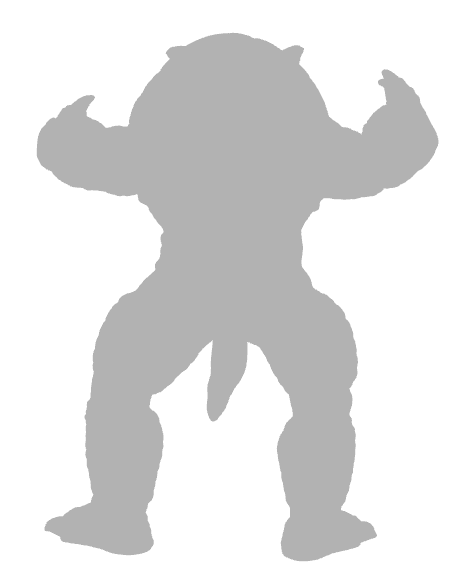

# 表面法向量估计

In [5]:
# 读取数据
mesh = o3d.io.read_triangle_mesh(r'G:\open3d\data\ArmadilloMesh.ply')

print("计算表面法向量")
mesh.compute_vertex_normals()

print("法向量坐标")
print(np.asarray(mesh.triangle_normals))

# 此时可视化，由于有了表面法向量，可以确定光源的位置，因此三角网格会显得立体
o3d.visualization.draw_geometries([mesh])



计算表面法向量
法向量坐标
[[-0.85509317 -0.43184309  0.2869272 ]
 [-0.83961303 -0.15290204  0.52122062]
 [ 0.1418538  -0.98462038  0.10198142]
 ...
 [ 0.54484498  0.83419374  0.08523353]
 [ 0.49905922  0.82303575  0.27120481]
 [ 0.67946882  0.67031486  0.29832887]]


可视化结果如下  
  
  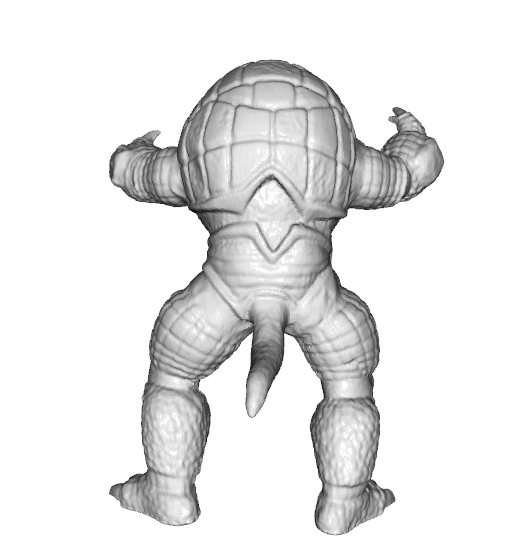

# 裁剪三角网格

通过numpy可以实现对三角网格的裁剪

In [8]:
# 深拷贝mesh，并命名mesh1
mesh1 = copy.deepcopy(mesh)

# o3d.utility.Vector3iVector是将int32的numpy形状数组（n，3）转换为Open3D格式。 
# np.asarray(mesh1.triangles)[:len(mesh1.triangles) // 2, :]表示先将三角形的三个顶点索引转换成numpy格式，之后再取前一半三角形信息(len(mesh1.triangles) // 2)作为新的三角网格
mesh1.triangles = o3d.utility.Vector3iVector(np.asarray(mesh1.triangles)[:len(mesh1.triangles) // 2, :])

# 法向量也是同样的操作方式
mesh1.triangle_normals = o3d.utility.Vector3dVector(
    np.asarray(mesh1.triangle_normals)[:len(mesh1.triangle_normals) // 2, :])

print(mesh1.triangles)
o3d.visualization.draw_geometries([mesh1])

std::vector<Eigen::Vector3i> with 172972 elements.
Use numpy.asarray() to access data.


可视化结果如下  
  
  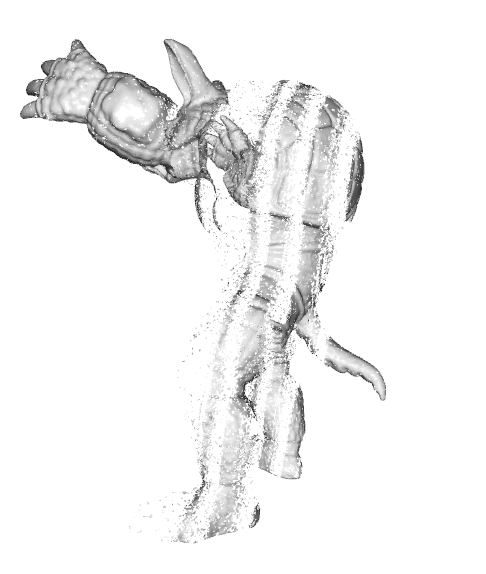

# 着色

In [11]:
# 三角网格上色，同样使用paint_uniform_color
mesh.paint_uniform_color([1, 0.706, 0])
o3d.visualization.draw_geometries([mesh])

着色结果如图  
  
  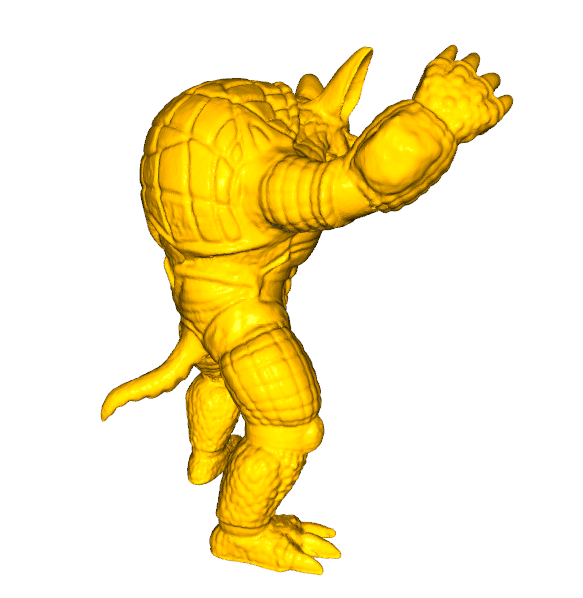

# 三角网格的性质

open3d可以读取三角网格中一些重要的性质。其中一个性质为流形(manifold)(关于流形的概念还请自行百度)。open3d提供is_edge_manifold和is_vertex_manifold检查三角网格的流形性质。

如果每个边都围绕一个或两个三角形，则三角形网格是edge流形。is_edge_manifold返回True或者False，其中一个参数allow_boundary_edges决定是否考虑边界的edge

此外，若某顶点的星形邻域（围绕该顶点的所有面和边的集合）是edge流形且edge连通的，则该三角形网格在该顶点处是流形，即vertex流形。（tips：此处解释可能并不准确）

****

另一个性质是自相交(self-intersection)，使用is_self_intersecting会返回True或False。如果网格中存在与另一个网格相交的三角形，最会返回True。

watertight网格定义为满足edge_manifold和vertex_manifold条件，但却不是自相交的网格，使用is_watertight可以检查三角网格是否为watertight网格

****

使用is_orientable可以检查三角网格是否可以定向。如果三角网格是可定向的，例如三角形可以以所有法线都指向外部的方式定向。

以下代码定义一个函数，该函数可以检查上述的所提及的三角网格的性质

****

In [2]:
def check_properties(name, mesh): # 定义检查性质的函数
    
    mesh.compute_vertex_normals() # 计算网格的法向量

    edge_manifold = mesh.is_edge_manifold(allow_boundary_edges=True) # 检查网格是否为edge_manifold(考虑网格边缘)，如果是则返回True
    edge_manifold_boundary = mesh.is_edge_manifold(allow_boundary_edges=False) # 不考虑网格边缘

    vertex_manifold = mesh.is_vertex_manifold() # 检查网格是否为vertex_manifold，如果是则返回True

    self_intersecting = mesh.is_self_intersecting() # 检查网格是否为自相交

    watertight = mesh.is_watertight() # 检查网格是否为watertight网格

    orientable = mesh.is_orientable() # 检查网格是否可定向

    print(name)
    print(f"  edge_manifold:          {edge_manifold}")
    print(f"  edge_manifold(不考虑边缘): {edge_manifold_boundary}")
    print(f"  vertex_manifold:        {vertex_manifold}")
    print(f"  self_intersecting:      {self_intersecting}")
    print(f"  watertight:             {watertight}")
    print(f"  orientable:             {orientable}")

    geoms = [mesh] # 使用括号将mesh括起来，方便之后的可视化

    if not edge_manifold: #如果网格不属于edge_manifold(考虑网格边缘) 将用红色的线标记非流形的edges
        edges = mesh.get_non_manifold_edges(allow_boundary_edges=True) # get_non_manifold_edges获取非流形的edges
        geoms.append(o3dtut.edges_to_lineset(mesh, edges, (1, 0, 0))) # 将非流形的edges标记为红色

    if not edge_manifold_boundary: #如果网格不属于edge_manifold(不考虑网格边缘) 将用绿色的线标记非流形的edges
        edges = mesh.get_non_manifold_edges(allow_boundary_edges=False)
        geoms.append(o3dtut.edges_to_lineset(mesh, edges, (0, 1, 0)))

    if not vertex_manifold: #如果网格不属于vertex_manifold，将非流形的vertices标记为蓝色
        verts = np.asarray(mesh.get_non_manifold_vertices()) # 获取非流形的vertices的索引，将其转换为numpy数组
        pcl = o3d.geometry.PointCloud(
            points=o3d.utility.Vector3dVector(np.asarray(mesh.vertices)[verts])) # 根据索引选择非流形的vertices
        pcl.paint_uniform_color((0, 0, 1)) # 上蓝色
        geoms.append(pcl)

    if self_intersecting: # 如果网格是自相交的，则着色为粉红色
        intersecting_triangles = np.asarray(
            mesh.get_self_intersecting_triangles()) #get_self_intersecting_triangles返回网格中自相交的三角形的索引
        # 选择一个面
        intersecting_triangles = intersecting_triangles[0:1]
        intersecting_triangles = np.unique(intersecting_triangles)
        print("可视化自相交的三角形")
        triangles = np.asarray(mesh.triangles)[intersecting_triangles] # 选择自相交的三角形
        # 获取edge信息
        edges = [
            np.vstack((triangles[:, i], triangles[:, j]))
            for i, j in [(0, 1), (1, 2), (2, 0)]
        ]
        edges = np.hstack(edges).T
        edges = o3d.utility.Vector2iVector(edges)
        geoms.append(o3dtut.edges_to_lineset(mesh, edges, (1, 0, 1)))  #着色为粉红色
    o3d.visualization.draw_geometries(geoms, mesh_show_back_face=True)

****

Mesh
  edge_manifold:          True
  edge_manifold(不考虑边缘): True
  vertex_manifold:        True
  self_intersecting:      False
  watertight:             True
  orientable:             True


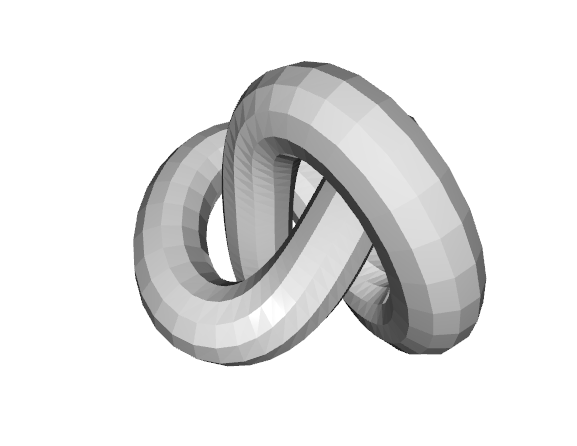

In [5]:
import open3d_tutorial as o3dtut

mesh = o3d.io.read_triangle_mesh(r'G:\open3d\data\KnotMesh.ply')
check_properties('Mesh', mesh) # 使用定义的函数读取三角网的性质


上图中没有任何点或者线被着色

Mobius
  edge_manifold:          True
  edge_manifold(不考虑边缘): False
  vertex_manifold:        True
  self_intersecting:      False
  watertight:             False
  orientable:             False


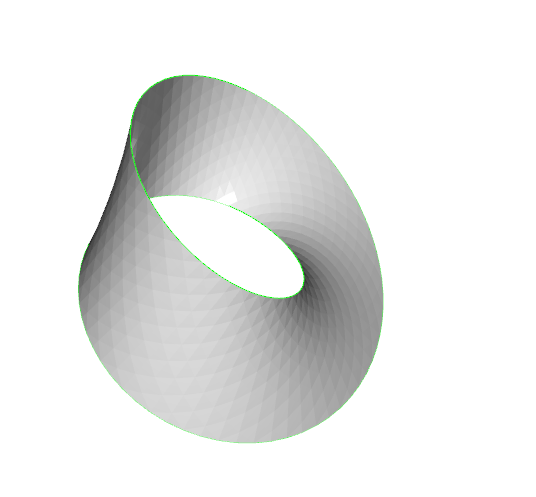

In [6]:
check_properties('Mobius', o3d.geometry.TriangleMesh.create_mobius(twists=1))

莫比乌斯环在不考虑边缘的情况下，其边缘为非流形，着色为绿色

non-manifold edge
  edge_manifold:          False
  edge_manifold(不考虑边缘): False
  vertex_manifold:        True
  self_intersecting:      False
  watertight:             False
  orientable:             True


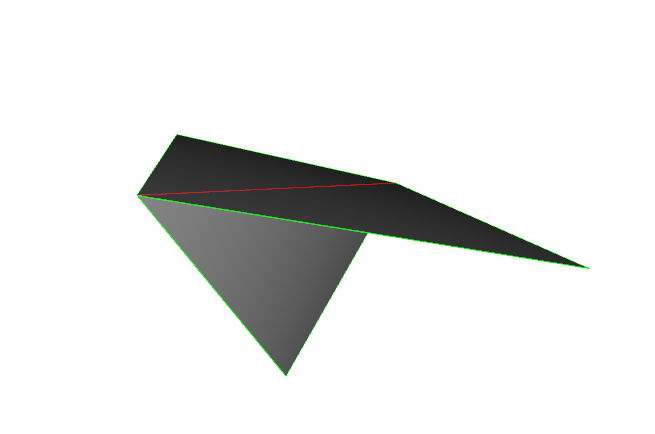

In [9]:
check_properties("non-manifold edge", o3dtut.get_non_manifold_edge_mesh())

无论是否考虑边缘都是非流形网格

non-manifold vertex
  edge_manifold:          True
  edge_manifold(不考虑边缘): True
  vertex_manifold:        False
  self_intersecting:      False
  watertight:             False
  orientable:             True


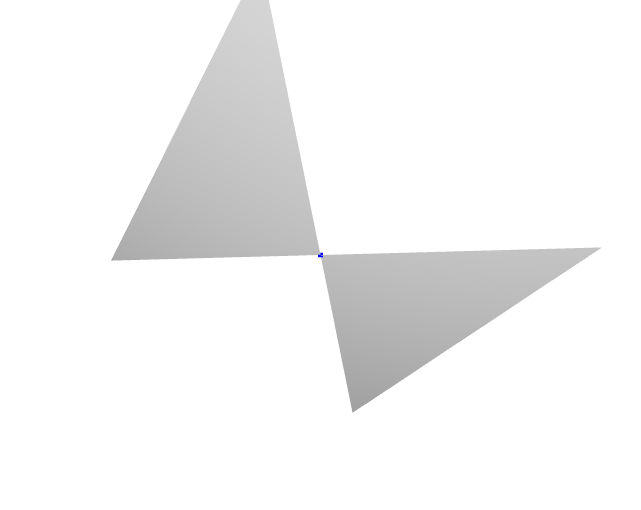

In [10]:
check_properties("non-manifold vertex", o3dtut.get_non_manifold_vertex_mesh())

蓝色的顶点并不是流形vertex

open box
  edge_manifold:          True
  edge_manifold(不考虑边缘): False
  vertex_manifold:        True
  self_intersecting:      False
  watertight:             False
  orientable:             True


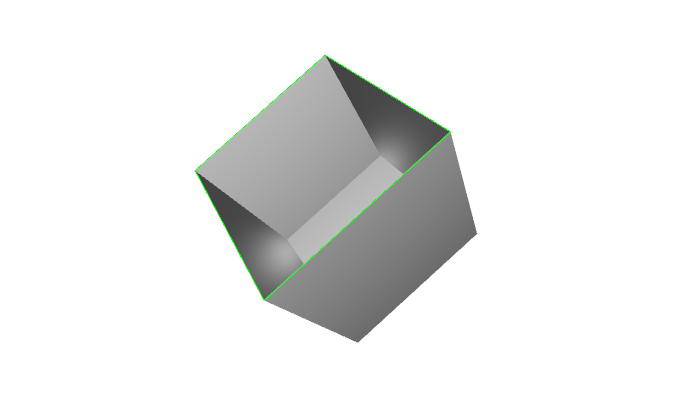

In [11]:
check_properties("open box", o3dtut.get_open_box_mesh())

intersecting_boxes
  edge_manifold:          True
  edge_manifold(不考虑边缘): True
  vertex_manifold:        True
  self_intersecting:      True
  watertight:             False
  orientable:             True
可视化自相交的三角形


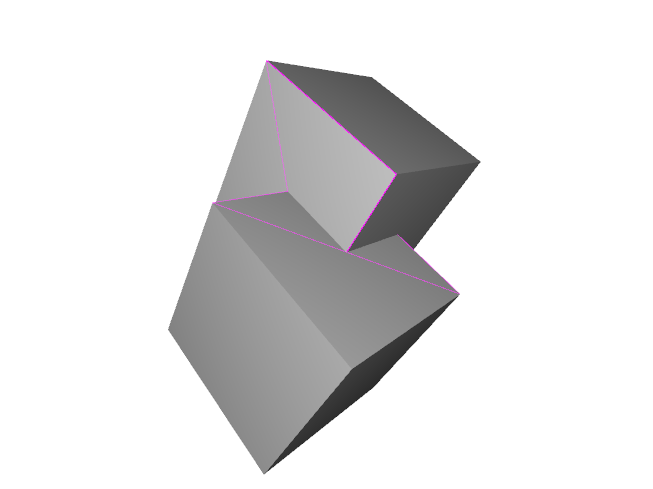

In [12]:
check_properties("intersecting_boxes", o3dtut.get_intersecting_boxes_mesh())

粉红色的线围起来的区域代表相交的区域

# 网格滤波

使用滤波可以平滑一些含有噪声的网格

# 平均滤波

一个比较简单的滤波方法为平均滤波，计算公式如下：  
  
  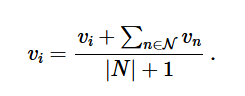  
    
  其中vi表示待处理的顶点坐标，通过累加周围N个顶点坐标并除以N+1，得到一个平均值，将这个值作为vi新的顶点坐标

通过filter_smooth_simple函数可以调用平均滤波，其中一个参数number_of_iterations定义为需要处理多少次

In [3]:
#print('首先人为添加一点噪声，使得mesh变得粗糙不平滑')
mesh = o3d.io.read_triangle_mesh(r'G:\open3d\data\KnotMesh.ply')
vertices = np.asarray(mesh.vertices) # 读取mesh的各个顶点坐标

# 使用随机数添加噪声
noise = 5
vertices += np.random.uniform(0, noise, size=vertices.shape)
mesh.vertices = o3d.utility.Vector3dVector(vertices)
mesh.compute_vertex_normals()
o3d.visualization.draw_geometries([mesh]) # 添加噪声后的mesh

#print('使用平均滤波处理1次')
mesh_out = mesh.filter_smooth_simple(number_of_iterations=1)
mesh_out.compute_vertex_normals()
o3d.visualization.draw_geometries([mesh_out]) 

#print('使用平均滤波连续处理5次')
mesh_out = mesh.filter_smooth_simple(number_of_iterations=5)
mesh_out.compute_vertex_normals()
o3d.visualization.draw_geometries([mesh_out])

添加噪声后的mesh  
  
  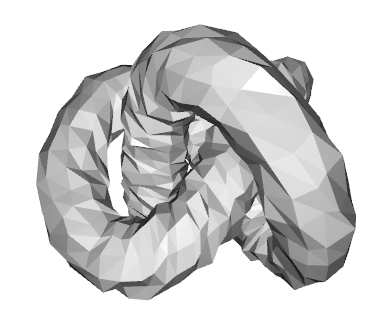

使用平均滤波处理1次的mesh  
  
  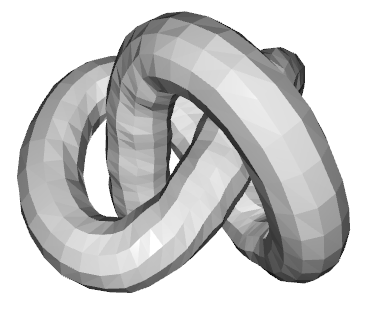

使用平均滤波连续处理5次后的mesh  
  
  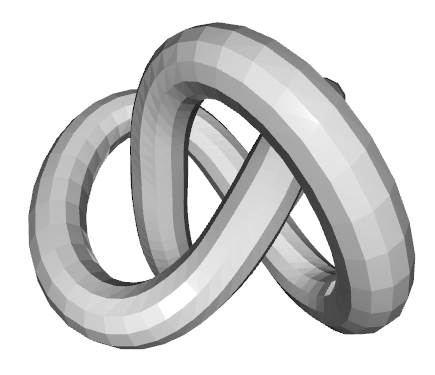

# 拉普拉斯滤波

拉普拉斯滤波的公式定义如下  
  
  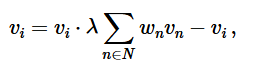  
    
  其中λ定义了滤波器的强度，wn是一个与距离有关的归一化权重

使用filter_smooth_laplacian调用拉普拉斯滤波器，有两个参数number_of_iterations和lambda，分别定义了滤波次数和滤波强度

In [4]:
# 使用拉普拉斯滤波器滤波10次
mesh_out = mesh.filter_smooth_laplacian(number_of_iterations=10)
mesh_out.compute_vertex_normals()
o3d.visualization.draw_geometries([mesh_out])


# 使用拉普拉斯滤波器滤波50次
mesh_out = mesh.filter_smooth_laplacian(number_of_iterations=50)
mesh_out.compute_vertex_normals()
o3d.visualization.draw_geometries([mesh_out])

[Open3D WARNING] [ViewControl] SetViewPoint() failed because window height and width are not set.


滤波10次后的效果  
  
  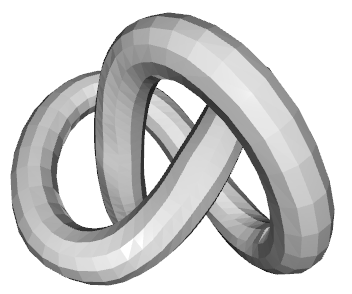

滤波50次后的效果  
  
  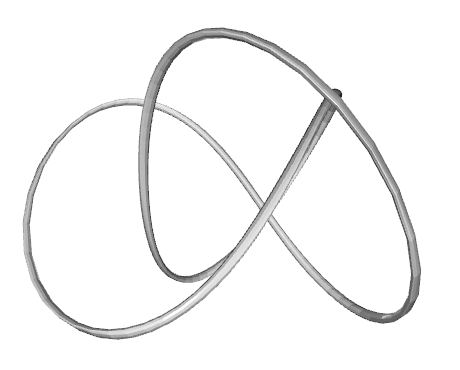

# Taubin滤波器

上述两个滤波器都有一个问题：即会导致mesh收缩。Taubin滤波器可以避免这种情况。通过filter_smooth_taubin可以调用taubin滤波器。

In [5]:
# 使用taubin滤波器滤波10次
mesh_out = mesh.filter_smooth_taubin(number_of_iterations=10)
mesh_out.compute_vertex_normals()
o3d.visualization.draw_geometries([mesh_out])

# 使用taubin滤波器滤波100次
mesh_out = mesh.filter_smooth_taubin(number_of_iterations=100)
mesh_out.compute_vertex_normals()
o3d.visualization.draw_geometries([mesh_out])

[Open3D WARNING] [ViewControl] SetViewPoint() failed because window height and width are not set.


滤波10次后的效果  
  
  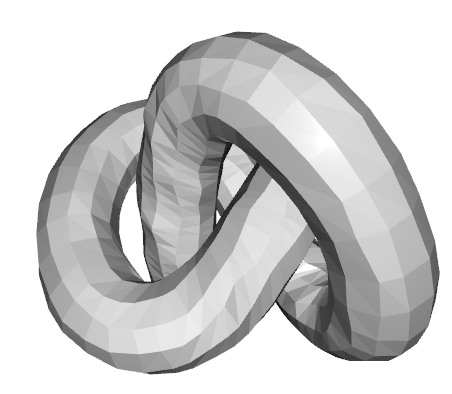

滤波100次后的效果，可以看出网格并没有收缩，但有一些地方不够平滑。  
  
  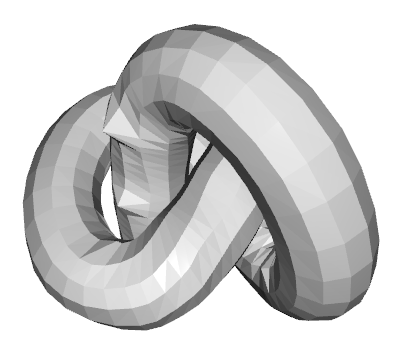

# 采样

open3d提供了从网格中采样出点云的函数。使用sample_points_uniformly可以从3d表面中均匀的采样出点云，其中一个参数number_of_points定义了需要采样出多少个点云。

In [3]:
# 创造一个网格球体
mesh = o3d.geometry.TriangleMesh.create_sphere() 

# 计算法向量
mesh.compute_vertex_normals()

# 将球体可视化
o3d.visualization.draw_geometries([mesh])

#使用sample_points_uniformly将网格球体采样成点云球体，其中点云个数为500
pcd = mesh.sample_points_uniformly(number_of_points=500)

# 可视化点云
o3d.visualization.draw_geometries([pcd])

[Open3D WARNING] [ViewControl] SetViewPoint() failed because window height and width are not set.


可视化网格球体  
  
  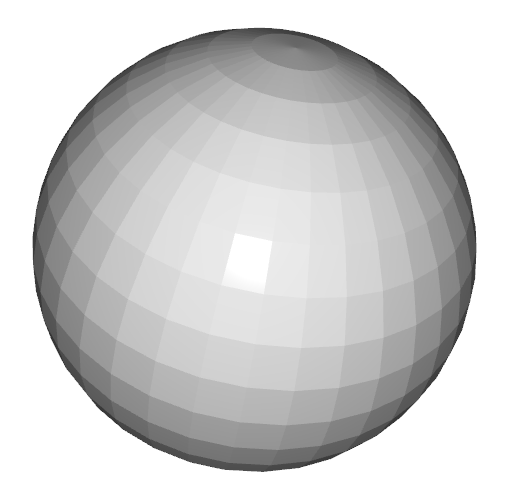

采样成点云后的球体  
  
  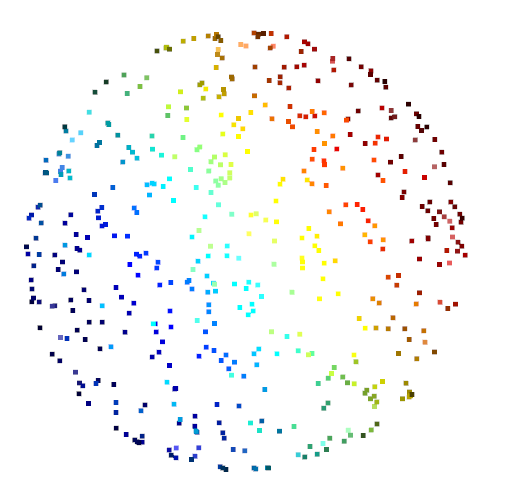

均匀采样通过随机或固定间隔的方式从表面采样点，但可能导致某些区域点密度高，其他区域稀疏的问题。  
sample_points_poisson_disk函数也可以从网格中采样点，其中每个点与相邻点的距离大致相同。其实现方式是从一个密集的初始点集（如均匀采样的结果）开始，根据最小距离规则，逐步移除不符合条件的点，直到满足均匀性要求。  
其中一个参数init_factor定义初始点云密度因子，默认为5。表明首先采样init_factor x number_of_points个点，然后根据距离逐步消除点云，直到点云个数为number_of_points个点

In [5]:
mesh = o3d.io.read_triangle_mesh(r'G:\open3d\data\ArmadilloMesh.ply') # 读取网格
mesh.compute_vertex_normals() # 计算法向量

pcd = mesh.sample_points_poisson_disk(number_of_points=500, init_factor=5) # 首先采样2500个点，在消除点，直到点的个数为500
o3d.visualization.draw_geometries([pcd])

pcd = mesh.sample_points_uniformly(number_of_points=2500) # 首先均匀采样2500个点
pcd = mesh.sample_points_poisson_disk(number_of_points=500, pcl=pcd) #pcl表明用于消除的初始点云，如果init_factor已经提供则可以忽视该参数
o3d.visualization.draw_geometries([pcd])

结果如图所示，从图中可以看出各点的间距大致相同(最好自己在可视化窗口旋转着看)
  
  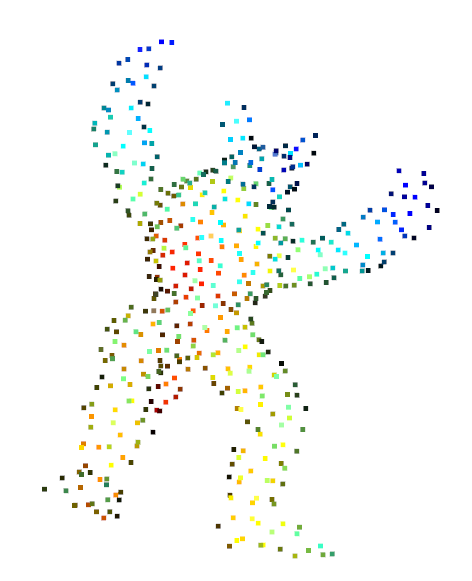

# 网格细分

在网格细分中，需要将每个三角形细分成许多较小的三角形。最简单的操作是计算每个三角形每条边的中点，并将三角形分成四个较小的三角形。  
这可以通过subdivide_midpoint函数实现。3D表面和面积保持不变，但顶点和三角形的数量增加。参数number_of_iterations定义了这个过程应该重复多少次。

In [6]:
mesh = o3d.geometry.TriangleMesh.create_box() # 创造一个正方体网格

mesh.compute_vertex_normals()

print(f'正方体网格有{len(mesh.vertices)} 顶点和 {len(mesh.triangles)} 三角形')

o3d.visualization.draw_geometries([mesh], zoom=0.8, mesh_show_wireframe=True) # 可视化正方体网格

mesh = mesh.subdivide_midpoint(number_of_iterations=1) # 细分三角形，重复1次

print(f'细分后有{len(mesh.vertices)} 顶点和 {len(mesh.triangles)} 三角形')

o3d.visualization.draw_geometries([mesh], zoom=0.8, mesh_show_wireframe=True) # 可视化细分后的正方体网格

正方体网格有8 顶点和 12 三角形
细分后有26 顶点和 48 三角形
[Open3D WARNING] [ViewControl] SetViewPoint() failed because window height and width are not set.


初始的正方体网格

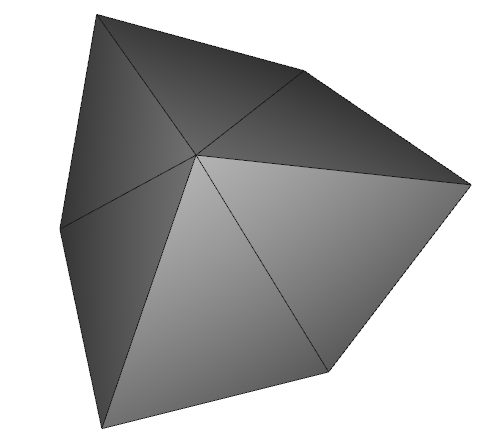

细分后的正方体网格  
  
  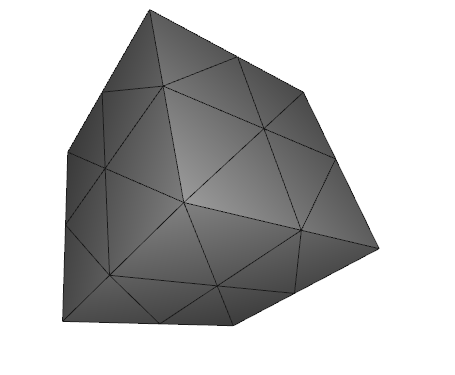

另外一个函数subdivide_loop也可以用来细分网格，该方法可以使得细分后的网格更加平滑

In [7]:
mesh = o3d.geometry.TriangleMesh.create_sphere() # 创造网格球体

mesh.compute_vertex_normals()

print(f'正方体网格有{len(mesh.vertices)} 顶点和 {len(mesh.triangles)} 三角形')

o3d.visualization.draw_geometries([mesh], zoom=0.8, mesh_show_wireframe=True) # 可视化初始的网格



mesh1 = mesh.subdivide_midpoint(number_of_iterations=1) # 使用subdivide_midpoint细分三角形，重复1次
print(f'细分后mesh1有{len(mesh1.vertices)} 顶点和 {len(mesh1.triangles)} 三角形')
o3d.visualization.draw_geometries([mesh1], zoom=0.8, mesh_show_wireframe=True) # 可视化subdivide_midpoint细分后的结果


mesh2 = mesh.subdivide_loop(number_of_iterations=1) # 使用subdivide_loop细分三角形，重复1次
print(f'细分后mesh2有{len(mesh1.vertices)} 顶点和 {len(mesh1.triangles)} 三角形')
o3d.visualization.draw_geometries([mesh2], zoom=0.8, mesh_show_wireframe=True) # 可视化subdivide_loop细分后的结果

正方体网格有762 顶点和 1520 三角形
细分后mesh1有3042 顶点和 6080 三角形
[Open3D WARNING] [ViewControl] SetViewPoint() failed because window height and width are not set.
细分后mesh2有3042 顶点和 6080 三角形
[Open3D WARNING] [ViewControl] SetViewPoint() failed because window height and width are not set.


初始的网格  
  
  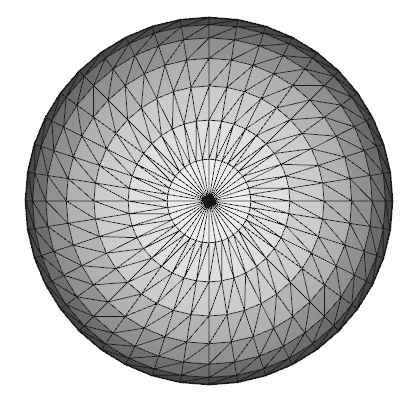

使用中点细分的网格  
  
  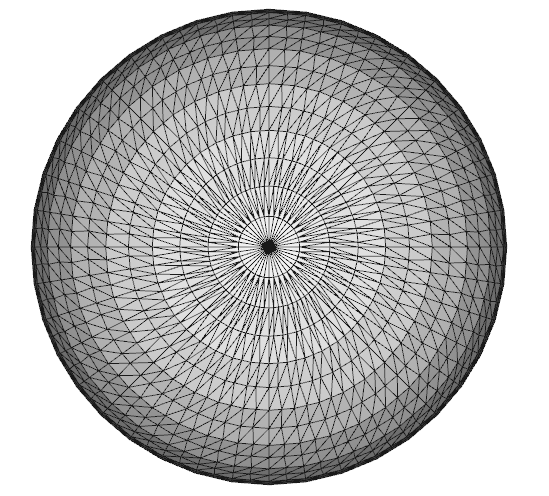

使用loop细分的网格  
  
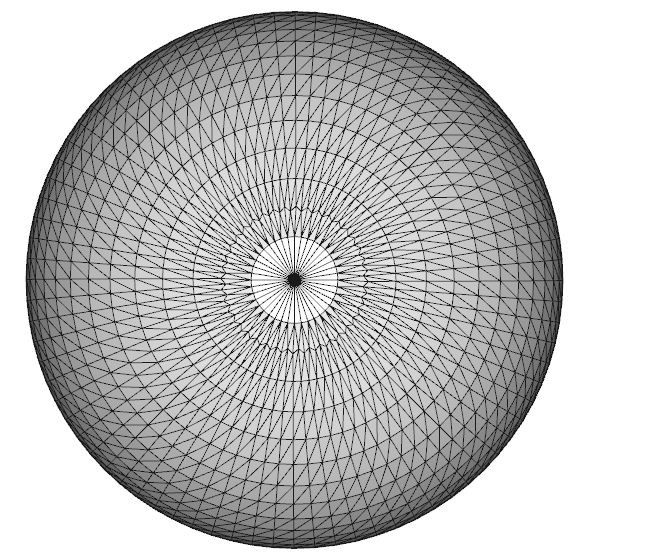

# 网格简化

与网格细分相反的是，有时我们希望用更少的三角形和顶点来表示一个高分辨率的网格，同时希望低分辨率的网格仍然保留高分辨率的网格的特征，为此Open3D实现了许多网格简化方法。

#### 顶点聚类

顶点聚类方法将一定尺寸体素内包含的所有顶点汇集到单个顶点。通过simplify_vertex_clustering函数实现，其中有两个参数。  
第一个参数voxel_size定义了体素的尺寸  
第二个参数contraction定义在体素内如何汇集顶点，可以使用o3d.geometry.SimplificationContraction.Average方法，在体素内计算所有顶点的平均值作为单个顶点的坐标

In [2]:
mesh_in = o3d.io.read_triangle_mesh(r'G:\open3d\data\BunnyMesh.ply')
mesh_in.compute_vertex_normals()

print(f'网格内有 {len(mesh_in.vertices)} 个顶点和 {len(mesh_in.triangles)} 三角形')

o3d.visualization.draw_geometries([mesh_in]) # 可视化初始的网格

# 定义体素尺寸（除以32）
voxel_size = max(mesh_in.get_max_bound() - mesh_in.get_min_bound()) / 32
print(f'体素大小 = {voxel_size:e}')

# 简化网格
mesh_smp = mesh_in.simplify_vertex_clustering(
    voxel_size=voxel_size, # 体素尺寸
    contraction=o3d.geometry.SimplificationContraction.Average) # 使用平均值来代表单个顶点
print(f'简化后的网格有 {len(mesh_smp.vertices)} 个点和 {len(mesh_smp.triangles)} 三角形')
o3d.visualization.draw_geometries([mesh_smp]) # 可视化简化后的网格

print("  ")

# 定义体素尺寸，相较于上述尺寸，这个体素尺寸会更大（除以16）
voxel_size = max(mesh_in.get_max_bound() - mesh_in.get_min_bound()) / 16
print(f'体素大小 = {voxel_size:e}')
# 简化网格
mesh_smp = mesh_in.simplify_vertex_clustering(
    voxel_size=voxel_size,
    contraction=o3d.geometry.SimplificationContraction.Average)
print(
    f'简化后的网格有 {len(mesh_smp.vertices)} 个点和 {len(mesh_smp.triangles)} 三角形'
)
o3d.visualization.draw_geometries([mesh_smp])

网格内有 35947 个顶点和 69451 三角形
体素大小 = 4.865594e-03
简化后的网格有 3222 个点和 6454 三角形
[Open3D WARNING] [ViewControl] SetViewPoint() failed because window height and width are not set.
  
体素大小 = 9.731187e-03
简化后的网格有 845 个点和 1724 三角形
[Open3D WARNING] [ViewControl] SetViewPoint() failed because window height and width are not set.


原始网格  
  
  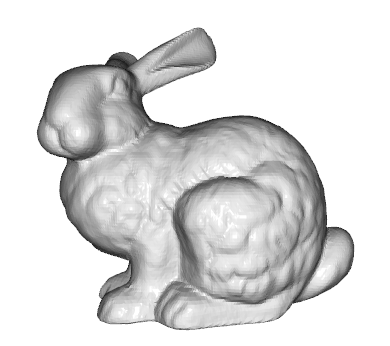

简化后网格(体素尺寸较小)  
  
  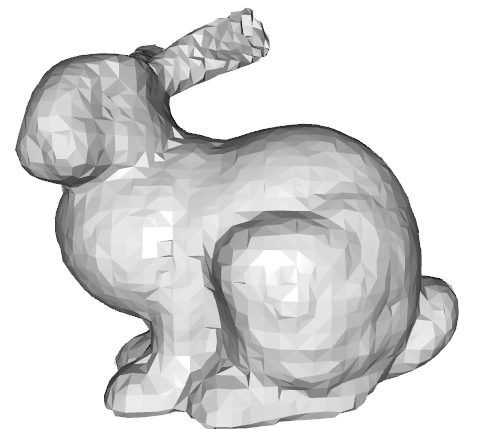

简化后网格(体素尺寸较大)  
  
  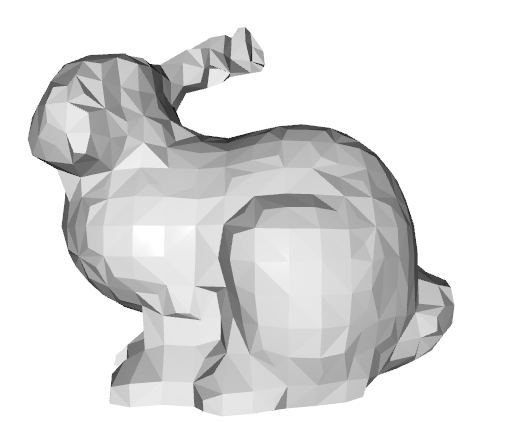

open3d还提供了simplify_quadric_decimation函数来简化网格，其中一个参数target_number_of_triangles定义了算法的停止条件(保留多少个三角形)

In [3]:
mesh_smp = mesh_in.simplify_quadric_decimation(target_number_of_triangles=6500) # 保留6500个三角形
print(f'简化后的网格有 {len(mesh_smp.vertices)} 个点和 {len(mesh_smp.triangles)} 三角形')
o3d.visualization.draw_geometries([mesh_smp]) # 可视化

mesh_smp = mesh_in.simplify_quadric_decimation(target_number_of_triangles=1700) # 保留1700个三角形
print(f'简化后的网格有 {len(mesh_smp.vertices)} 个点和 {len(mesh_smp.triangles)} 三角形')
o3d.visualization.draw_geometries([mesh_smp])

简化后的网格有 4405 个点和 6499 三角形
简化后的网格有 1979 个点和 1700 三角形
[Open3D WARNING] [ViewControl] SetViewPoint() failed because window height and width are not set.
[Open3D WARNING] [ViewControl] SetViewPoint() failed because window height and width are not set.


简化后网格(6500个面)  
  
  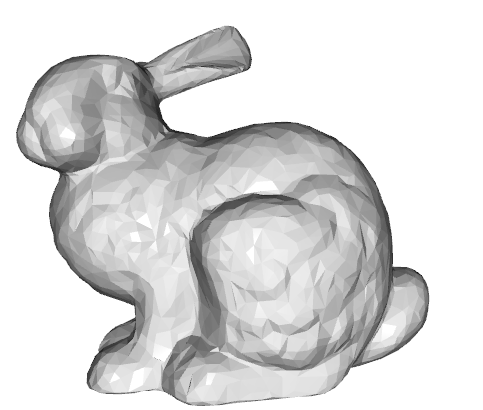

简化后网格(1700个面)  
  
  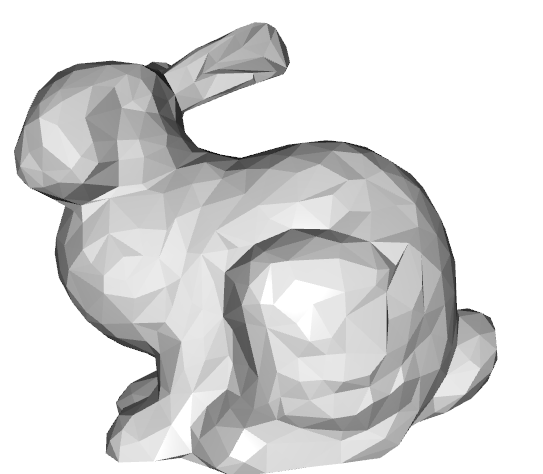